In [ ]:
!pip install ISLP

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize)
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
     QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression



In [ ]:
df = sns.load_dataset('mpg')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
df.isna().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model_year,0
origin,0
name,0


In [ ]:
df.dropna(inplace = True)
df.isna().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model_year,0
origin,0
name,0


In [ ]:
df['mpg01'] = np.where(df['mpg'] > np.median(df['mpg']), 1, 0)
df['mpg01'].value_counts()

,count
mpg01,
0,196
1,196


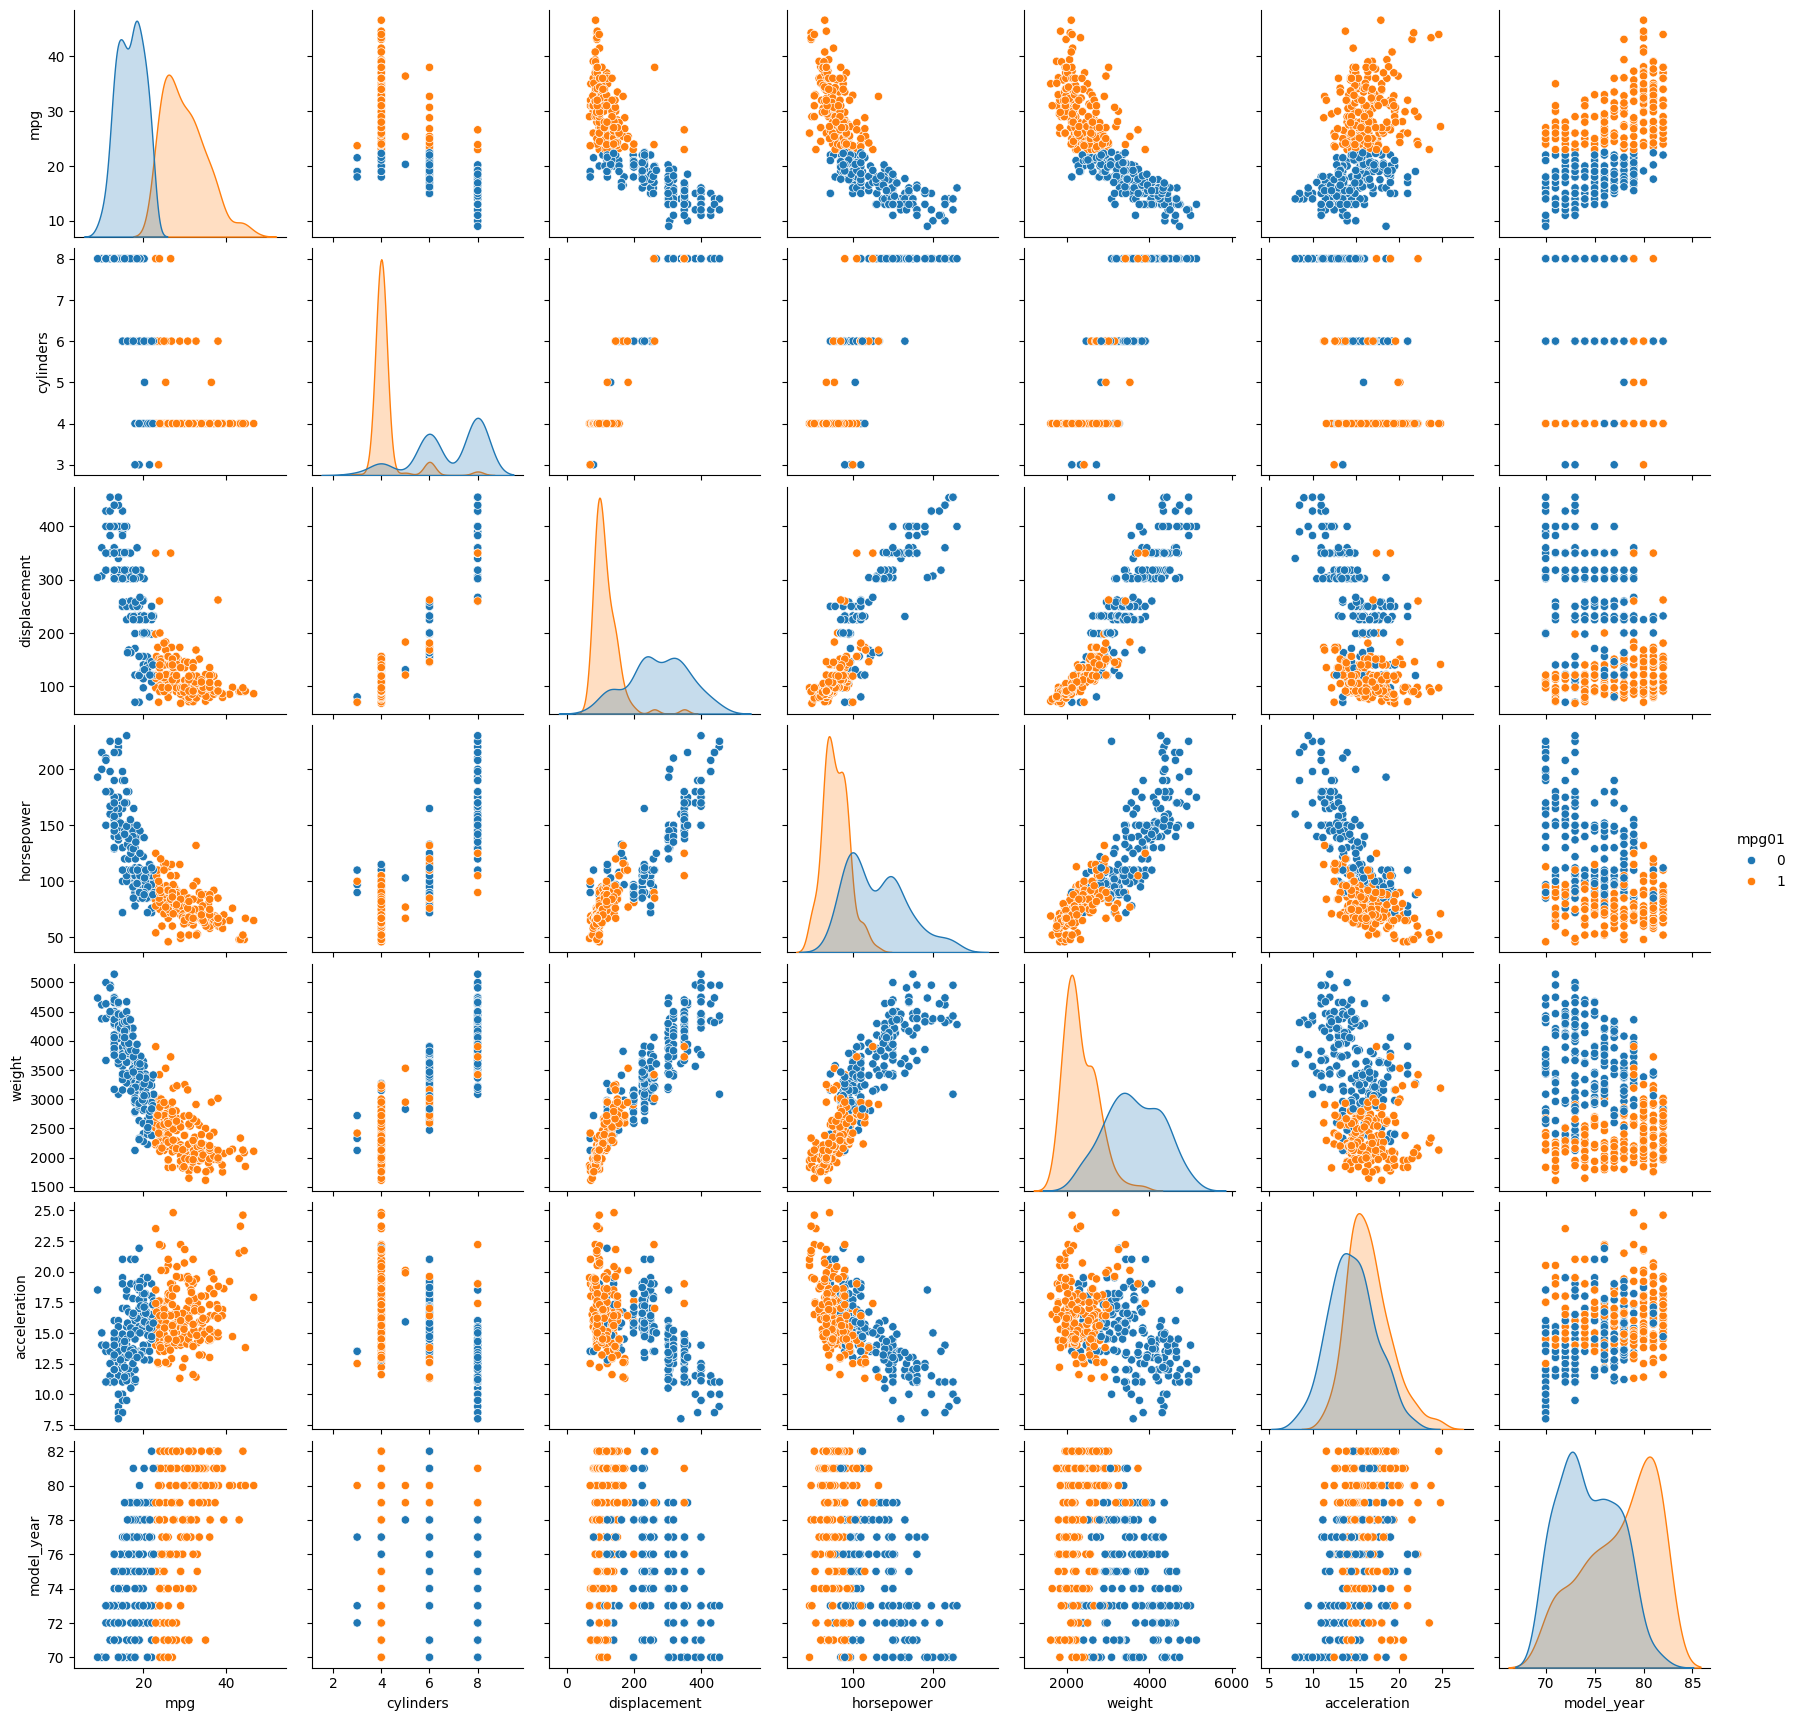

In [ ]:
sns.pairplot(data = df, hue = 'mpg01')

<Axes: >

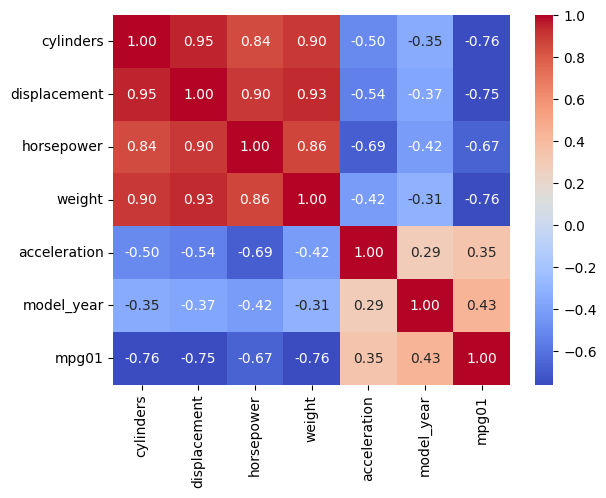

In [ ]:
df1 = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'mpg01']]
sns.heatmap(df1.corr(), annot = True, fmt = '2.2f', cmap = 'coolwarm')

<Axes: xlabel='origin', ylabel='mpg'>

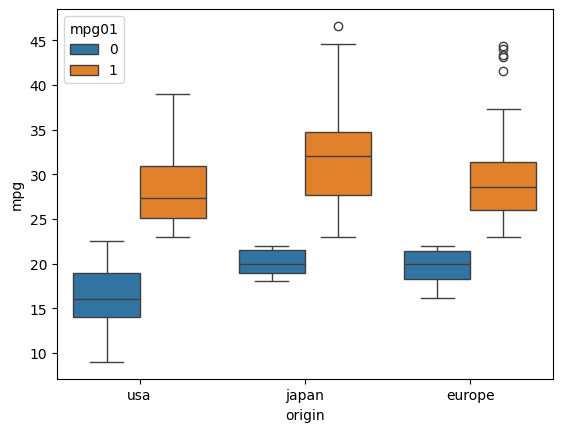

In [ ]:
sns.boxplot(x = 'origin', y = 'mpg', hue = 'mpg01', data = df)

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
df['brand'] = df['name'].str.split().str[0]

In [ ]:
X = df.drop(['displacement', 'horsepower', 'weight', 'mpg', 'name', 'mpg01', 'acceleration', 'origin'], axis = 1) #Dropped the vars which were supercorrelated with each other and keep the one with the highest corr with Y
                                                                                        #Reason: They explain the same information about Y becouse X_i aprox X_i+1
y = df['mpg01']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2025)
categorical = ['brand']
le = LabelEncoder()

std = StandardScaler(copy = True, with_mean= True, with_std  = True)


for col in categorical:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = X_test[col].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)


numerical = list(set(X.columns) - set(categorical))

for col in numerical:
    X_train[col] = std.fit_transform(X_train[[col]])
    X_test[col] = std.transform(X_test[[col]])







In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
def cm(conf_matrix):
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()


def cr(report):
    print("Clasification Report:")
    report_df = pd.DataFrame(report).transpose()
    print(report_df)




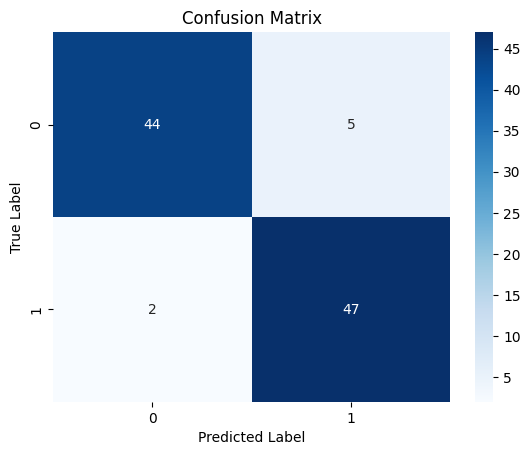

In [ ]:
lda = LDA()
model_lda = lda.fit(X_train, y_train)
model_preds = model_lda.predict(X_test)
matrix_conf = confusion_matrix(y_test, model_preds)
cm(matrix_conf)


In [ ]:
report = classification_report(y_test, model_preds, target_names=['0', '1'], output_dict=True )
cr(report)

Clasification Report:
              precision    recall  f1-score    support
0              0.956522  0.897959  0.926316  49.000000
1              0.903846  0.959184  0.930693  49.000000
accuracy       0.928571  0.928571  0.928571   0.928571
macro avg      0.930184  0.928571  0.928504  98.000000
weighted avg   0.930184  0.928571  0.928504  98.000000


In [ ]:
test_error = (1 - 0.928571 ) * 100
print(f'The error obtenied on test is : {test_error:.4f} %')

The error obtenied on test is : 7.1429 %


In [ ]:
qda = QDA()
model = qda.fit(X_train, y_train)

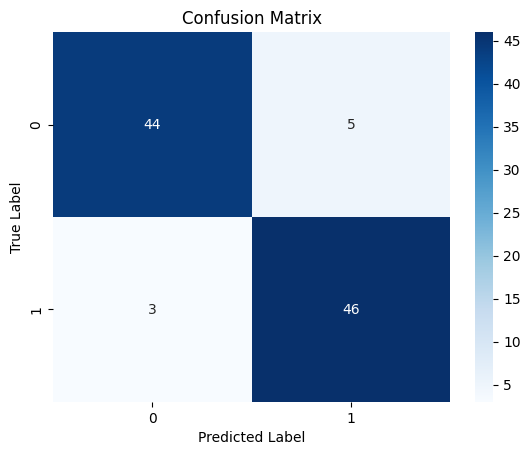

In [ ]:
model_preds = model.predict(X_test)
conf_m = confusion_matrix(y_test, model_preds)
cm(conf_m)

In [ ]:
report = classification_report(y_test, model_preds, target_names = ['0', '1'], output_dict=True)
cr(report)
test_error = (1 - 0.918367) * 100
print(f'The error obtenied on test is : {test_error:.4f} %')

Clasification Report:
              precision    recall  f1-score    support
0              0.936170  0.897959  0.916667  49.000000
1              0.901961  0.938776  0.920000  49.000000
accuracy       0.918367  0.918367  0.918367   0.918367
macro avg      0.919065  0.918367  0.918333  98.000000
weighted avg   0.919065  0.918367  0.918333  98.000000
The error obtenied on test is : 8.1633 %


In [ ]:
model = sm.GLM(y_train, X_train, family = sm.families.Binomial()).fit()
summarize(model)


,coef,std err,z,P>|z|
cylinders,-2.8637,0.355,-8.063,0.000
model_year,1.1249,0.229,4.902,0.000
brand,-0.0228,0.013,-1.744,0.081


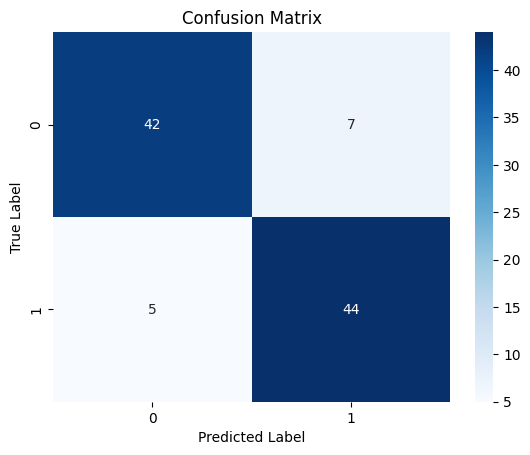

In [ ]:
model_proba = model.predict(X_test)
model_pred = (model_proba > 0.50).astype(int)
conf_m = confusion_matrix(y_test, model_pred)
cm(conf_m)

In [ ]:
report = classification_report(y_test, model_pred, target_names = ['0', '1'], output_dict=True)
cr(report)
test_error = (1 - 0.877551    ) * 100
print(f'The error obtenied on test is : {test_error:.4f} %')

Clasification Report:
              precision    recall  f1-score    support
0              0.893617  0.857143  0.875000  49.000000
1              0.862745  0.897959  0.880000  49.000000
accuracy       0.877551  0.877551  0.877551   0.877551
macro avg      0.878181  0.877551  0.877500  98.000000
weighted avg   0.878181  0.877551  0.877500  98.000000
The error obtenied on test is : 9.1837 %


We got a worse result. (IF add brand and Origin you get 8% error)

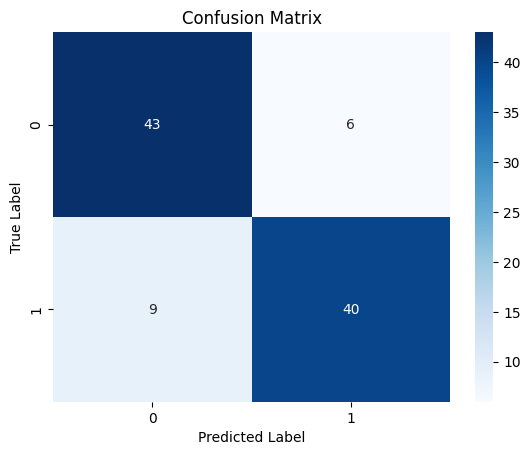

Clasification Report:
              precision    recall  f1-score    support
0              0.826923  0.877551  0.851485  49.000000
1              0.869565  0.816327  0.842105  49.000000
accuracy       0.846939  0.846939  0.846939   0.846939
macro avg      0.848244  0.846939  0.846795  98.000000
weighted avg   0.848244  0.846939  0.846795  98.000000


In [ ]:
'''for k in range(1,11):
    print(f'Value for K: {k}')
    knn = KNeighborsClassifier(n_neighbors=k)
    model = knn.fit(X_train, y_train)
    model_pred = model.predict(X_test)
    cmx = confusion_matrix(y_test, model_pred)
    cm(cmx)
    report = classification_report(y_test, model_pred, target_names = ['0', '1'], output_dict=True)
    cr(report)
    print('\n')'''

knn = KNeighborsClassifier(n_neighbors=10)
model = knn.fit(X_train, y_train)
model_pred = model.predict(X_test)
cmx = confusion_matrix(y_test, model_pred)
cm(cmx)
report = classification_report(y_test, model_pred, target_names = ['0', '1'], output_dict=True)
cr(report)


Its the worst one until this moment

# Extra --- GausianModel--- Naive Bayes Classifier

In [ ]:
nb = GaussianNB()
model = nb.fit(X_train, y_train)

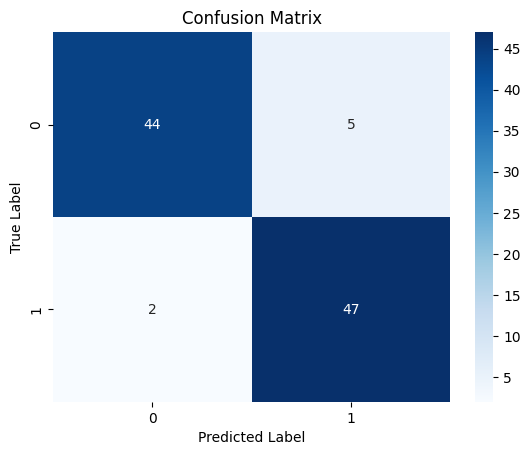

Clasification Report:
              precision    recall  f1-score    support
0              0.956522  0.897959  0.926316  49.000000
1              0.903846  0.959184  0.930693  49.000000
accuracy       0.928571  0.928571  0.928571   0.928571
macro avg      0.930184  0.928571  0.928504  98.000000
weighted avg   0.930184  0.928571  0.928504  98.000000


In [ ]:
model_pred = model.predict(X_test)
cmx = confusion_matrix(y_test, model_pred)
cm(cmx)
report = classification_report(y_test, model_pred, target_names = ['0', '1'], output_dict=True)
cr(report)

It ties the LDA for first place.

Conclusion: Ive tried many other subset of variables in order to get a better score, but couldnt. We might finally achieved the bayes error and couldnt go lower because of overlap of the classes.